# Fourier Analysis



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 



In [46]:
# ex16.1

T = 1.5 
w0 = 2*np.pi / T 
print(w0)

f = lambda t: 1.7 + np.cos(w0*t+1.0472)

4.1887902047863905


In [51]:
t= np.array([0, .15, .3, .45, .6, .75, .9, 1.05, 1.2, 1.35])
y = np.array([2.2, 1.595, 1.031, .722, .786, 1.2, 1.805, 2.369, 2.678, 2.614])
y2 = f(t)
print(y)
print(y2)
dt = 0.15
n = len(t)

sum_y = np.sum(y)
sum_yc = np.sum(y*np.cos(w0*t))
sum_ys = np.sum(y*np.sin(w0*t))
print('sum_y=',sum_y)
print('sum_yc=',sum_yc)
print('sum_ys=',sum_ys)

A0 = sum_y/n
print('A0=',A0)
A1 = sum_yc/n*2 
print('A1=',A1)
B1 = sum_ys/n*2 
print('B1=',B1)

# the least square fit becomes 
f2 = lambda t: A0 + A1*np.cos(w0*t) + B1*np.sin(w0*t) 



[2.2   1.595 1.031 0.722 0.786 1.2   1.805 2.369 2.678 2.614]
[2.19999788 1.5954691  1.03086757 0.72185189 0.78645554 1.20000212
 1.8045309  2.36913243 2.67814811 2.61354446]
sum_y= 17.0
sum_yc= 2.4999619994223794
sum_ys= -4.330686508848297
A0= 1.7
A1= 0.49999239988447586
B1= -0.8661373017696594


Text(0, 0.5, 'y')

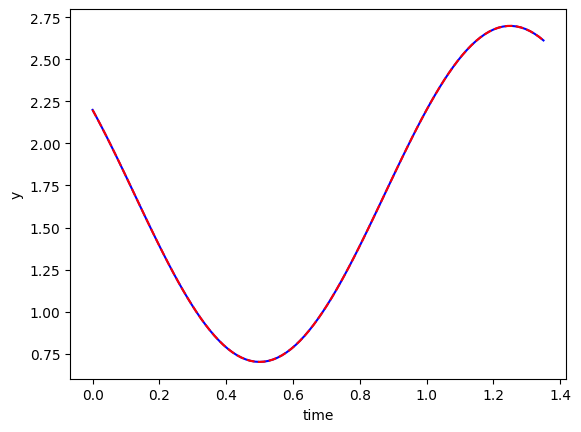

In [58]:
tt = np.linspace(t[0],t[-1],101)
yy = f(tt)
zz = f2(tt)

plt.plot(tt,yy,c='b')
plt.plot(tt,zz,c='r',ls='--')
plt.xlabel('time')
plt.ylabel('y')

In [ ]:
# ex 16.3 and ex 16.4 
# Power Spectrum 
# https://docs.scipy.org/doc/scipy/tutorial/fft.html
from scipy.fft import fft

In [52]:
#  compute DFT
n = 8
dt = 0.02
fs = 1./dt # sampling freq.
T = 0.16 # period
tspan = np.arange(0,n)/fs 
print(tspan)
freq1 = 12.5
freq2 = 18.75

func = lambda t: 5 + np.cos(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t)
y = func(tspan)

print('sampling frequency, fs = {} [Hz]'.format(fs))
print('total sample length = ', n*dt)
print(n*dt == T)
print('Nyquist freq = f_max=',fs/2)
print('lowest detactable freq=', 1/(n*dt))

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14]
sampling frequency, fs = 50.0 [Hz]
total sample length =  0.16
True
Nyquist freq = f_max= 25.0
lowest detactable freq= 6.25


Text(0, 0.5, 'y')

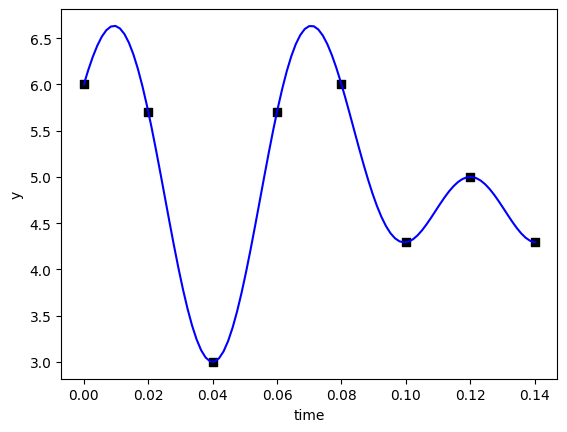

In [53]:
tt = np.linspace(tspan[0],tspan[-1],101) 
yy = func(tt)
plt.plot(tt,yy,c='b')
plt.scatter(tspan,y,c='k',marker='s')
plt.xlabel('time')
plt.ylabel('y')



In [54]:
Y = fft(y)/n
print(Y)
# Y[0] corresponds to the mean,
# Y[1:n/2] contain the positive-frequency terms, 
# Y[n/2:] contain the negative-frequency terms
freq = np.arange(1,n)/T
print(freq)

[ 5.00000000e+00-0.00000000e+00j  2.08997499e-16+8.32667268e-17j
  5.00000000e-01-0.00000000e+00j -2.08997499e-16-5.00000000e-01j
  0.00000000e+00-0.00000000e+00j -2.08997499e-16+5.00000000e-01j
  5.00000000e-01+0.00000000e+00j  2.08997499e-16-8.32667268e-17j]
[ 6.25 12.5  18.75 25.   31.25 37.5  43.75]


[ 6.25 12.5  18.75 25.  ]
4


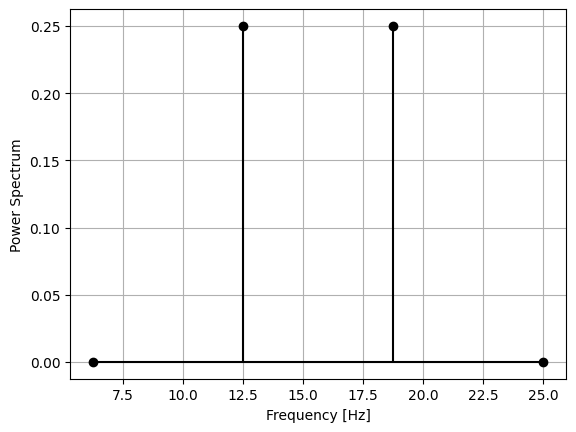

In [55]:
# compute and plot the power spectrum 
nyquist = fs/2 
n2 = int(n/2)
fP = freq[0:n2]
Pyy = np.abs(Y[1:n2+1])**2
print(fP)
fig = plt.figure()
plt.stem(fP, Pyy, basefmt='k-', linefmt='k-', markerfmt='ko')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectrum')
print(n2)